# Exploratory Data Analysis (EDA) & Preprocessing

## Objective
Analyze the crop yield dataset and prepare data for machine learning:
- Load and explore dataset structure
- Visualize feature distributions and correlations
- Analyze relationships between features and target variable
- Prepare data for modeling

## Dataset Information
- **Source**: Agricultural yield dataset
- **Size**: 800 samples, 9 features
- **Target**: Yield (tons/hectare)
- **Features**: Soil type, crop, rainfall, temperature, fertilizer, irrigation, weather, days to harvest

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import os

print("✅ Libraries imported successfully!")

✅ Libraries imported successfully!


In [2]:
# ==========================================
# 1. LOAD DATASET (Format Indonesia)
# ==========================================
# PENTING: Kita tambah parameter sep=';' dan decimal=',' 
# agar Python tidak bingung membaca file Anda.
print("Loading data...")
df = pd.read_csv('../data/dataset_800.csv', sep=';', decimal=',')
print(f"✅ Data loaded: {df.shape[0]} rows, {df.shape[1]} columns")
print("-" * 30)

# Cek apakah data sudah terbaca dengan benar (Harusnya tipe float64)
print("\nInfo Data:")
print(df.info())

print("\nCuplikan Data (Cek Angka Desimal):")
display(df.head())
print("-" * 30)

Loading data...
✅ Data loaded: 800 rows, 9 columns
------------------------------

Info Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Soil_Type               800 non-null    object 
 1   Crop                    800 non-null    object 
 2   Rainfall_mm             800 non-null    float64
 3   Temperature_Celsius     800 non-null    float64
 4   Fertilizer_Used         800 non-null    bool   
 5   Irrigation_Used         800 non-null    bool   
 6   Weather_Condition       800 non-null    object 
 7   Days_to_Harvest         800 non-null    int64  
 8   Yield_tons_per_hectare  800 non-null    float64
dtypes: bool(2), float64(3), int64(1), object(3)
memory usage: 45.4+ KB
None

Cuplikan Data (Cek Angka Desimal):


,Soil_Type,Crop,Rainfall_mm,Temperature_Celsius,Fertilizer_Used,Irrigation_Used,Weather_Condition,Days_to_Harvest,Yield_tons_per_hectare
0,Sandy,Cotton,897.077239,27.676966,False,True,Cloudy,122,6.555816
1,Clay,Rice,992.673282,18.026142,True,True,Rainy,140,8.527341
2,Loam,Barley,147.998025,29.794042,False,False,Sunny,106,1.127443
3,Sandy,Soybean,986.866331,16.644190,False,True,Rainy,146,6.517573
4,Silt,Wheat,730.379174,31.620687,True,True,Cloudy,110,7.248251


------------------------------


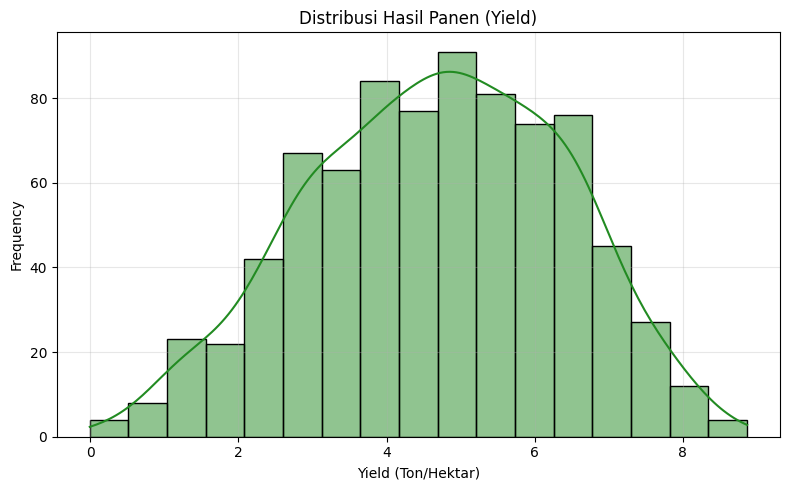


💡 Temuan Menarik:
   Data terdistribusi normal dengan sedikit variasi
   Range: -0.01 - 8.87 ton/ha
------------------------------


In [3]:
# ==========================================
# 2. EDA: ANALISIS TARGET (YIELD)
# ==========================================
plt.figure(figsize=(8, 5))
sns.histplot(df['Yield_tons_per_hectare'], kde=True, color='forestgreen')
plt.title('Distribusi Hasil Panen (Yield)')
plt.xlabel('Yield (Ton/Hektar)')
plt.ylabel('Frequency')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

print("\n💡 Temuan Menarik:")
print("   Data terdistribusi normal dengan sedikit variasi")
print(f"   Range: {df['Yield_tons_per_hectare'].min():.2f} - {df['Yield_tons_per_hectare'].max():.2f} ton/ha")
print("-" * 30)

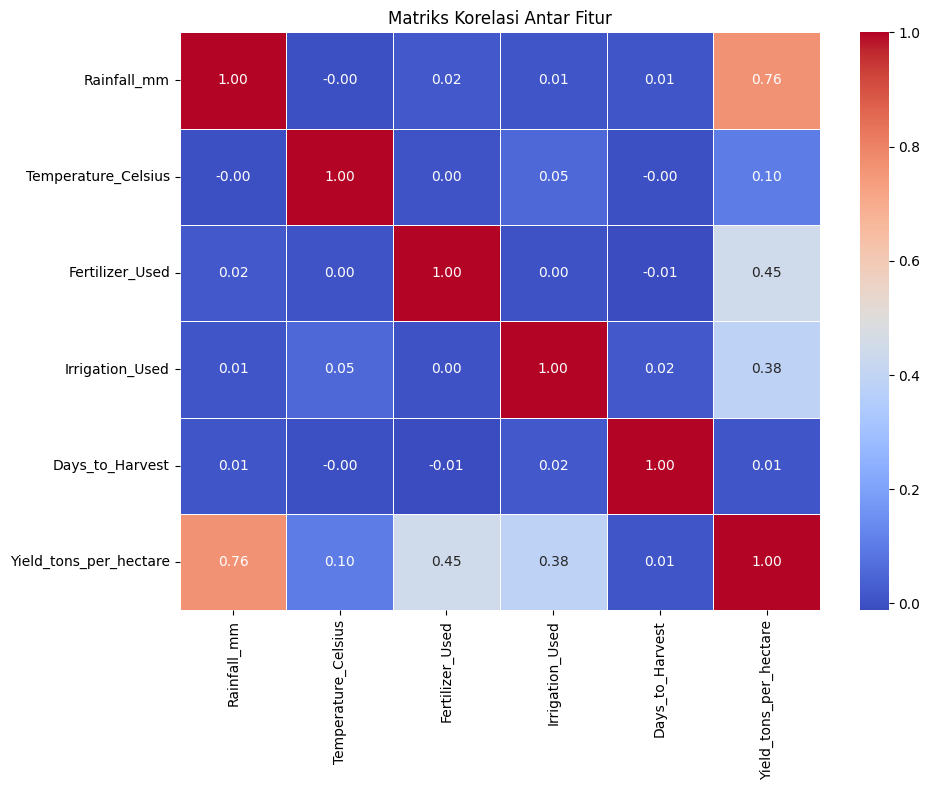


📊 Korelasi tertinggi dengan Yield:
   Rainfall_mm              : +0.764
   Fertilizer_Used          : +0.445
   Irrigation_Used          : +0.384
   Temperature_Celsius      : +0.100
   Days_to_Harvest          : +0.010
------------------------------


In [4]:
# ==========================================
# 3. EDA: KORELASI FITUR (HEATMAP)
# ==========================================
plt.figure(figsize=(10, 8))
correlation = df.corr(numeric_only=True)
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Matriks Korelasi Antar Fitur')
plt.tight_layout()
plt.show()

print("\n📊 Korelasi tertinggi dengan Yield:")
yield_corr = correlation['Yield_tons_per_hectare'].sort_values(ascending=False)
for col, val in yield_corr.items():
    if col != 'Yield_tons_per_hectare':
        print(f"   {col:25s}: {val:+.3f}")
print("-" * 30)

/tmp/ipykernel_23923/1179071526.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Crop', y='Yield_tons_per_hectare', data=df, ax=axes[0], palette='viridis', errorbar=None)
/tmp/ipykernel_23923/1179071526.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Weather_Condition', y='Yield_tons_per_hectare', data=df, ax=axes[1], palette='Set2')


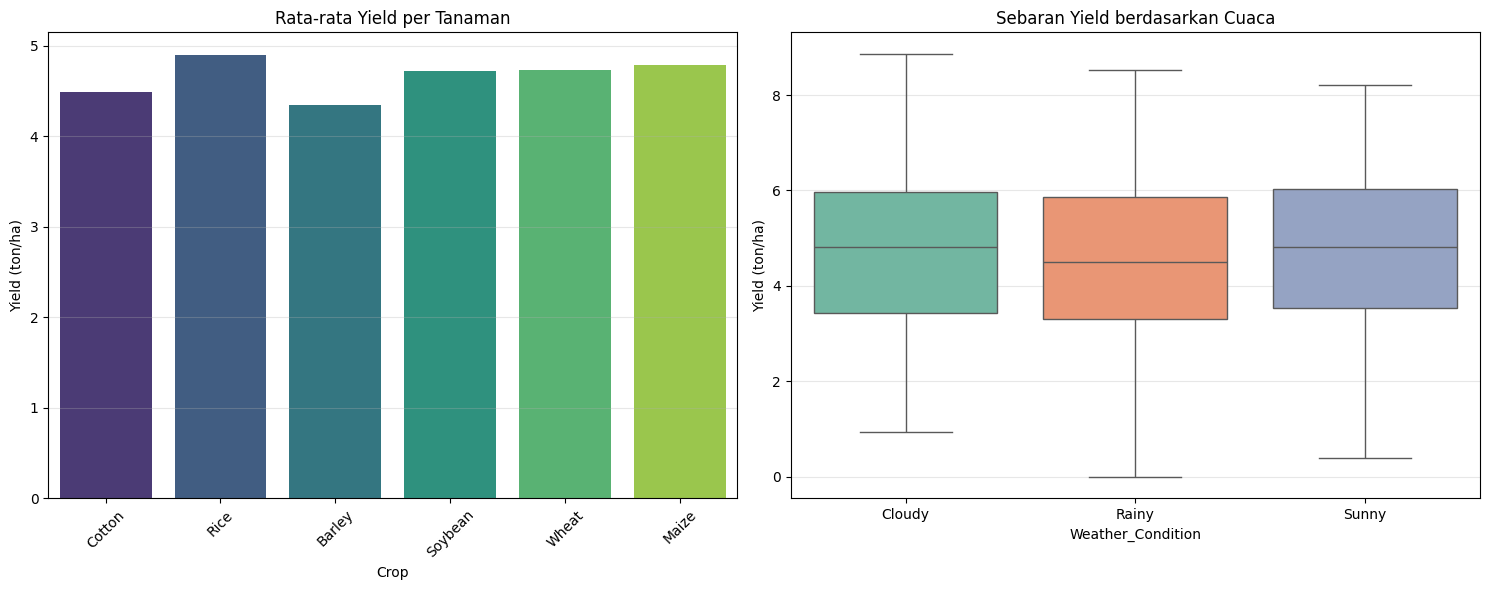


🌾 Rata-rata Yield per Tanaman:
Crop
Rice       4.902617
Maize      4.783868
Wheat      4.727675
Soybean    4.724653
Cotton     4.492907
Barley     4.348043
Name: Yield_tons_per_hectare, dtype: float64

🌦️ Rata-rata Yield per Kondisi Cuaca:
Weather_Condition
Sunny     4.740526
Cloudy    4.727687
Rainy     4.504654
Name: Yield_tons_per_hectare, dtype: float64
------------------------------


In [5]:
# ==========================================
# 4. EDA: ANALISIS CUACA & TANAMAN
# ==========================================
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Grafik 1: Yield vs Tanaman
sns.barplot(x='Crop', y='Yield_tons_per_hectare', data=df, ax=axes[0], palette='viridis', errorbar=None)
axes[0].set_title('Rata-rata Yield per Tanaman')
axes[0].tick_params(axis='x', rotation=45)
axes[0].set_ylabel('Yield (ton/ha)')
axes[0].grid(axis='y', alpha=0.3)

# Grafik 2: Yield vs Cuaca
sns.boxplot(x='Weather_Condition', y='Yield_tons_per_hectare', data=df, ax=axes[1], palette='Set2')
axes[1].set_title('Sebaran Yield berdasarkan Cuaca')
axes[1].set_ylabel('Yield (ton/ha)')
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

print("\n🌾 Rata-rata Yield per Tanaman:")
print(df.groupby('Crop')['Yield_tons_per_hectare'].mean().sort_values(ascending=False))

print("\n🌦️ Rata-rata Yield per Kondisi Cuaca:")
print(df.groupby('Weather_Condition')['Yield_tons_per_hectare'].mean().sort_values(ascending=False))
print("-" * 30)

In [6]:
# ==========================================
# 5. PREPROCESSING (DATA PREPARATION)
# ==========================================

# A. Pisahkan Fitur (X) dan Target (y)
# X adalah semua kolom KECUALI target
X = df.drop(columns=['Yield_tons_per_hectare'])
# y adalah target yang ingin diprediksi
y = df['Yield_tons_per_hectare']

print("✅ Data berhasil dipisahkan:")
print(f"   X shape: {X.shape}")
print(f"   y shape: {y.shape}")

✅ Data berhasil dipisahkan:
   X shape: (800, 8)
   y shape: (800,)


In [7]:
# B. Ubah Boolean menjadi Angka (0 dan 1)
# Komputer lebih suka angka 1/0 daripada True/False
bool_cols = ['Fertilizer_Used', 'Irrigation_Used']
X[bool_cols] = X[bool_cols].astype(int)

print("✅ Boolean columns converted to int (0/1)")

✅ Boolean columns converted to int (0/1)


In [8]:
# C. One-Hot Encoding untuk Kolom Kategori
# Mengubah teks (Crop, Soil, Weather) menjadi angka biner
# drop_first=True menghapus 1 kolom dummy untuk mencegah redundansi (praktik terbaik regresi)
X = pd.get_dummies(X, columns=['Crop', 'Soil_Type', 'Weather_Condition'], drop_first=True)

# Cek hasil perubahan
print("✅ Preprocessing Selesai!")
print(f"Jumlah Kolom Awal: 9")
print(f"Jumlah Kolom Setelah Encoding: {X.shape[1]}")
print("-" * 30)

✅ Preprocessing Selesai!
Jumlah Kolom Awal: 9
Jumlah Kolom Setelah Encoding: 17
------------------------------


In [9]:
# ==========================================
# 6. SPLIT DATA (Latih vs Uji)
# ==========================================
# Membagi data: 80% untuk Latihan (Train), 20% untuk Ujian (Test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Statistik Pembagian Data:")
print(f"Data Latih (Train): {X_train.shape[0]} baris")
print(f"Data Uji (Test)   : {X_test.shape[0]} baris")
print("-" * 30)

Statistik Pembagian Data:
Data Latih (Train): 640 baris
Data Uji (Test)   : 160 baris
------------------------------


In [10]:
# ==========================================
# 7. SIMPAN DATA (SAVE PROCESSED DATA)
# ==========================================
# Menyimpan data yang sudah bersih agar Minggu depan tinggal Load (tidak perlu cleaning lagi)

# Tentukan lokasi folder penyimpanan (sesuaikan dengan struktur folder Anda)
output_dir = '../data'

# Pastikan foldernya ada, kalau belum ada dibuatkan
os.makedirs(output_dir, exist_ok=True)

print(f"Menyimpan file ke folder '{output_dir}'...")

# Simpan ke 4 file CSV terpisah
X_train.to_csv(f'{output_dir}/X_train.csv', index=False)
X_test.to_csv(f'{output_dir}/X_test.csv', index=False)
y_train.to_csv(f'{output_dir}/y_train.csv', index=False)
y_test.to_csv(f'{output_dir}/y_test.csv', index=False)

print("✅ SUKSES! 4 File berikut telah tersimpan:")
print("   1. X_train.csv (Fitur Latih)")
print("   2. y_train.csv (Target Latih)")
print("   3. X_test.csv  (Fitur Uji)")
print("   4. y_test.csv  (Target Uji)")
print("\nSiap lanjut ke Minggu 3 (Modeling)!")

plt.tight_layout()
plt.show()

Menyimpan file ke folder '../data'...
✅ SUKSES! 4 File berikut telah tersimpan:
   1. X_train.csv (Fitur Latih)
   2. y_train.csv (Target Latih)
   3. X_test.csv  (Fitur Uji)
   4. y_test.csv  (Target Uji)

Siap lanjut ke Minggu 3 (Modeling)!


<Figure size 640x480 with 0 Axes>